In [173]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [174]:
prices = pd.read_csv('data/log_prices.csv', index_col='date')
prices = prices.dropna()
prices.head()

,brn,cl,ho,xrb
date,,,,
20150105,0.010676,0.025528,-0.023495,0.032481
20150112,-0.039646,-0.081290,-0.008362,-0.018356
20150119,0.082589,0.041151,0.022561,0.087349
20150126,0.117570,0.118920,0.091463,0.075879
20150202,0.056883,0.012610,0.069970,0.039044


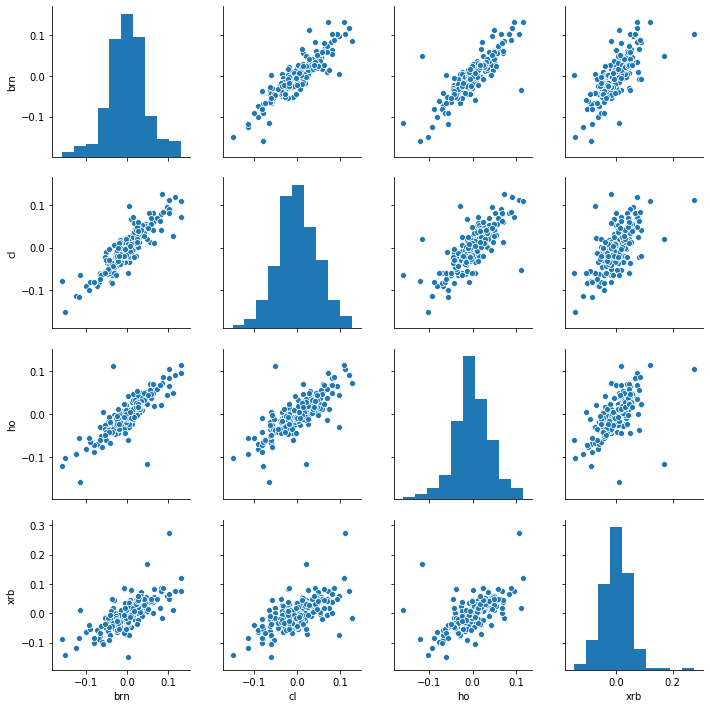

In [175]:
sb.pairplot(prices)
plt.show()

Empirical correlation

In [176]:
print(np.corrcoef(prices.T))

[[1.         0.89008101 0.84623251 0.71922929]
 [0.89008101 1.         0.77813331 0.65841689]
 [0.84623251 0.77813331 1.         0.62098952]
 [0.71922929 0.65841689 0.62098952 1.        ]]


Fit parameters of marginal distributions. Suppose that these are t-distributions.

In [177]:
param = {'brn': stats.t.fit(prices.brn), 
         'cl': stats.t.fit(prices.cl), 
         'ho': stats.t.fit(prices.ho), 
         'xrb': stats.t.fit(prices.xrb)}
param

{'brn': (4.717481643722772, 0.001395993688828745, 0.036571742170715),
 'cl': (35.15545988613356, 0.0003650380447012075, 0.045773879438890136),
 'ho': (5.5727271899375275, 0.00027987385271763623, 0.03382973903441035),
 'xrb': (5.853887016954179, -0.0002726353416228246, 0.04008764330453997)}

Generating 10000 observations from the Normal distribution

In [179]:
cov = np.array(prices.cov())
norm_sample = np.random.multivariate_normal([0, 0, 0, 0], cov, size=10000)

Uniform transformation

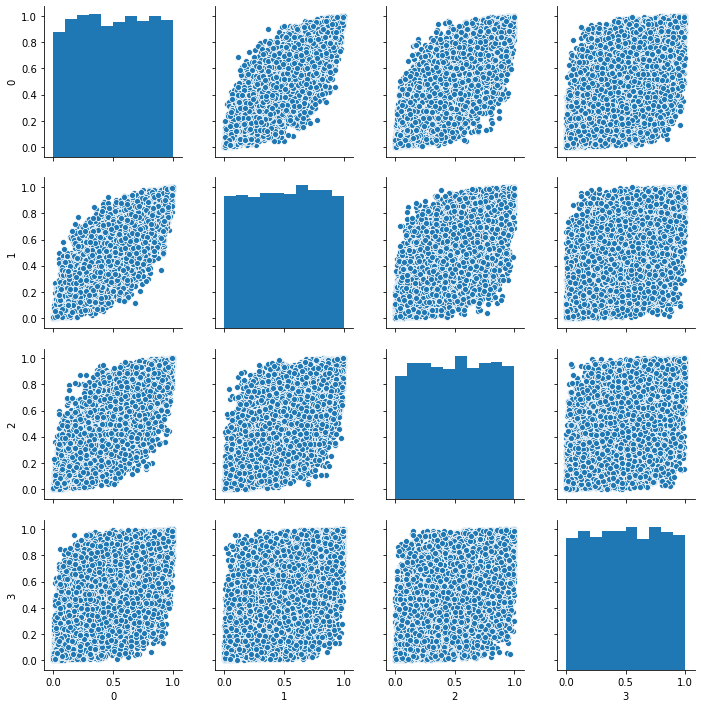

In [180]:
unif_sample = []
for i, i_sample in enumerate(norm_sample.T):
    unif_sample.append(stats.norm.cdf(i_sample, loc=0, scale=cov[i][i]**(1/2)))
unif_sample = np.array(unif_sample).T
sb.pairplot(pd.DataFrame(unif_sample))

Student's t transformation

In [184]:
df, loc, scale = param['brn']
brn_sample = stats.t.ppf(unif_sample.T[0], df, loc, scale)
df, loc, scale = param['cl']
cl_sample = stats.t.ppf(unif_sample.T[1], df, loc, scale)
df, loc, scale = param['ho']
ho_sample = stats.t.ppf(unif_sample.T[2], df, loc, scale)
df, loc, scale = param['xrb']
xrb_sample = stats.t.ppf(unif_sample.T[3], df, loc, scale)
gen_prices = pd.DataFrame({'brn': brn_sample, 
                           'cl': cl_sample, 
                           'ho': ho_sample, 
                           'xrb': xrb_sample})

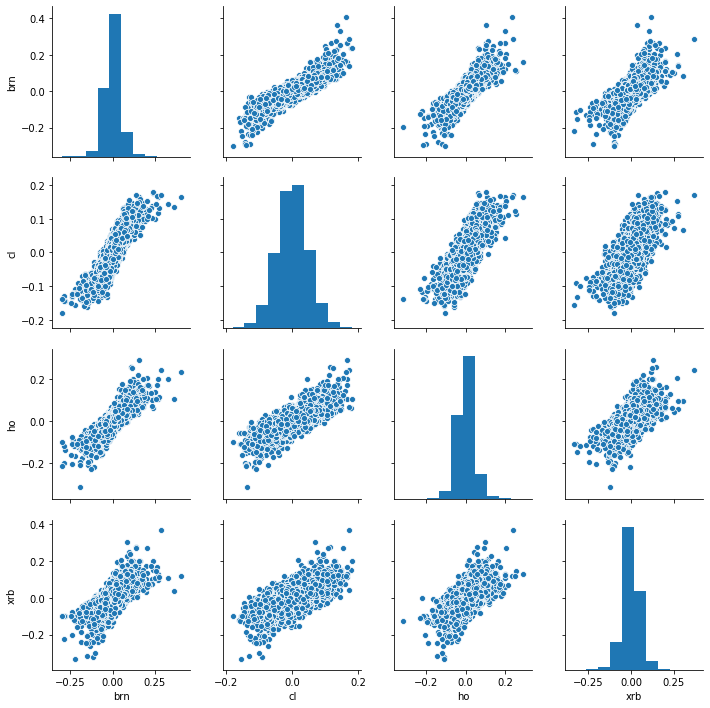

In [185]:
sb.pairplot(gen_prices)
plt.show()